# Exploratory Data Analysis: Time Usage

In [1]:
import pandas as pd
from datetime import datetime
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Loading in the CSV into Pandas

In [2]:
app_events=pd.read_csv('app_events.csv')
app_labels= pd.read_csv('app_labels.csv')
events= pd.read_csv('events.csv')
label_categories= pd.read_csv('label_categories.csv')
phone_brand= pd.read_csv('phone_brand_device_model.csv')
gender_age_train= pd.read_csv('gender_age_train.csv')
gender_age_test= pd.read_csv('gender_age_test.csv')

### Create Hour and Day of Week column  

In [4]:
train_time = gender_age_train.merge(events, on = 'device_id', how = 'left')
train_time.dropna(axis= 0, inplace=True) 

In [12]:
dayofweek = {
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
    7:'Saturday'
            }

train_time['hour'] = train_time['timestamp'].apply(lambda x: x.split(' ')[1].split(':')[0] )
train_time['Day of Week'] = train_time['timestamp'].apply(lambda x: x.split('-')[2].split(' ')[0])
train_time['Day of Week']= train_time['Day of Week'].astype(int).map(dayofweek)

In [16]:
train_time.head()

,device_id,gender,age,group,event_id,timestamp,longitude,latitude,hour,Day of Week
2,-8260683887967679142,M,35,M32-38,2479656.0,2016-05-01 14:23:37,0.00,0.00,14,Sunday
11,7477216237379271436,F,37,F33-42,280934.0,2016-05-04 14:10:03,119.57,31.75,14,Wednesday
12,7477216237379271436,F,37,F33-42,363585.0,2016-05-04 14:13:30,119.57,31.75,14,Wednesday
13,7477216237379271436,F,37,F33-42,935225.0,2016-05-06 18:51:15,0.00,0.00,18,Friday
14,7477216237379271436,F,37,F33-42,1551108.0,2016-05-04 14:09:29,119.57,31.75,14,Wednesday


# Visualize Mobile Usage by Hour

In [31]:
#creating value_count table for heatmap

columns = ['00', '01', '02', '03','04', '05','06','07','08','09','10','11', '12' ,'13','14','15', '16', '17', '18'
,'19','20','21','22','23']

index = ['M22-','M23-26','M27-28','M29-31','M32-38', 'M39+','F23-','F24-26','F27-28','F29-32','F33-42','F43+']

group_hour = pd.DataFrame(columns=columns, index=index)

for group in index:
    for column in columns:
        group_hour[column][group] = (train_time[train_time['group']==group]['hour'].value_counts()[column]/
                                     train_time[train_time['group']==group]['hour'].value_counts().sum())
    group_hour[columns]=group_hour[columns].astype(float)

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5,  20.5,  21.5,  22.5,  23.5]),
 <a list of 24 Text xticklabel objects>)

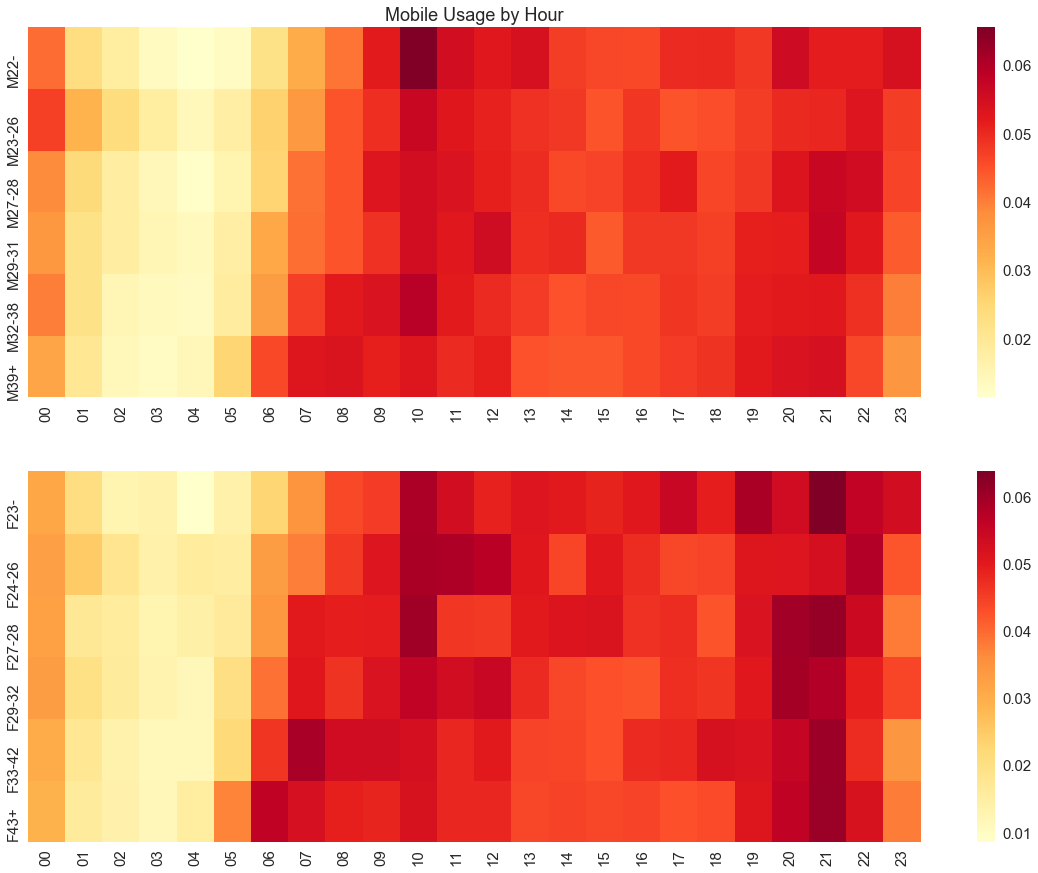

In [32]:
fig = plt.figure(figsize=(20,15))

plt.subplot(2,1,1)
sns.heatmap(group_hour.T[['M22-','M23-26','M27-28','M29-31','M32-38', 'M39+']].T, cmap = 'YlOrRd',)
sns.set(font_scale=1.5)
plt.xticks(rotation=90)
plt.title('Mobile Usage by Hour')
                         
                         
plt.subplot(2,1,2)
sns.heatmap(group_hour.T[['F23-','F24-26','F27-28','F29-32','F33-42','F43+']].T, cmap = 'YlOrRd')
sns.set(font_scale=1.5)
plt.xticks(rotation=90)


### Hour Usage per Group

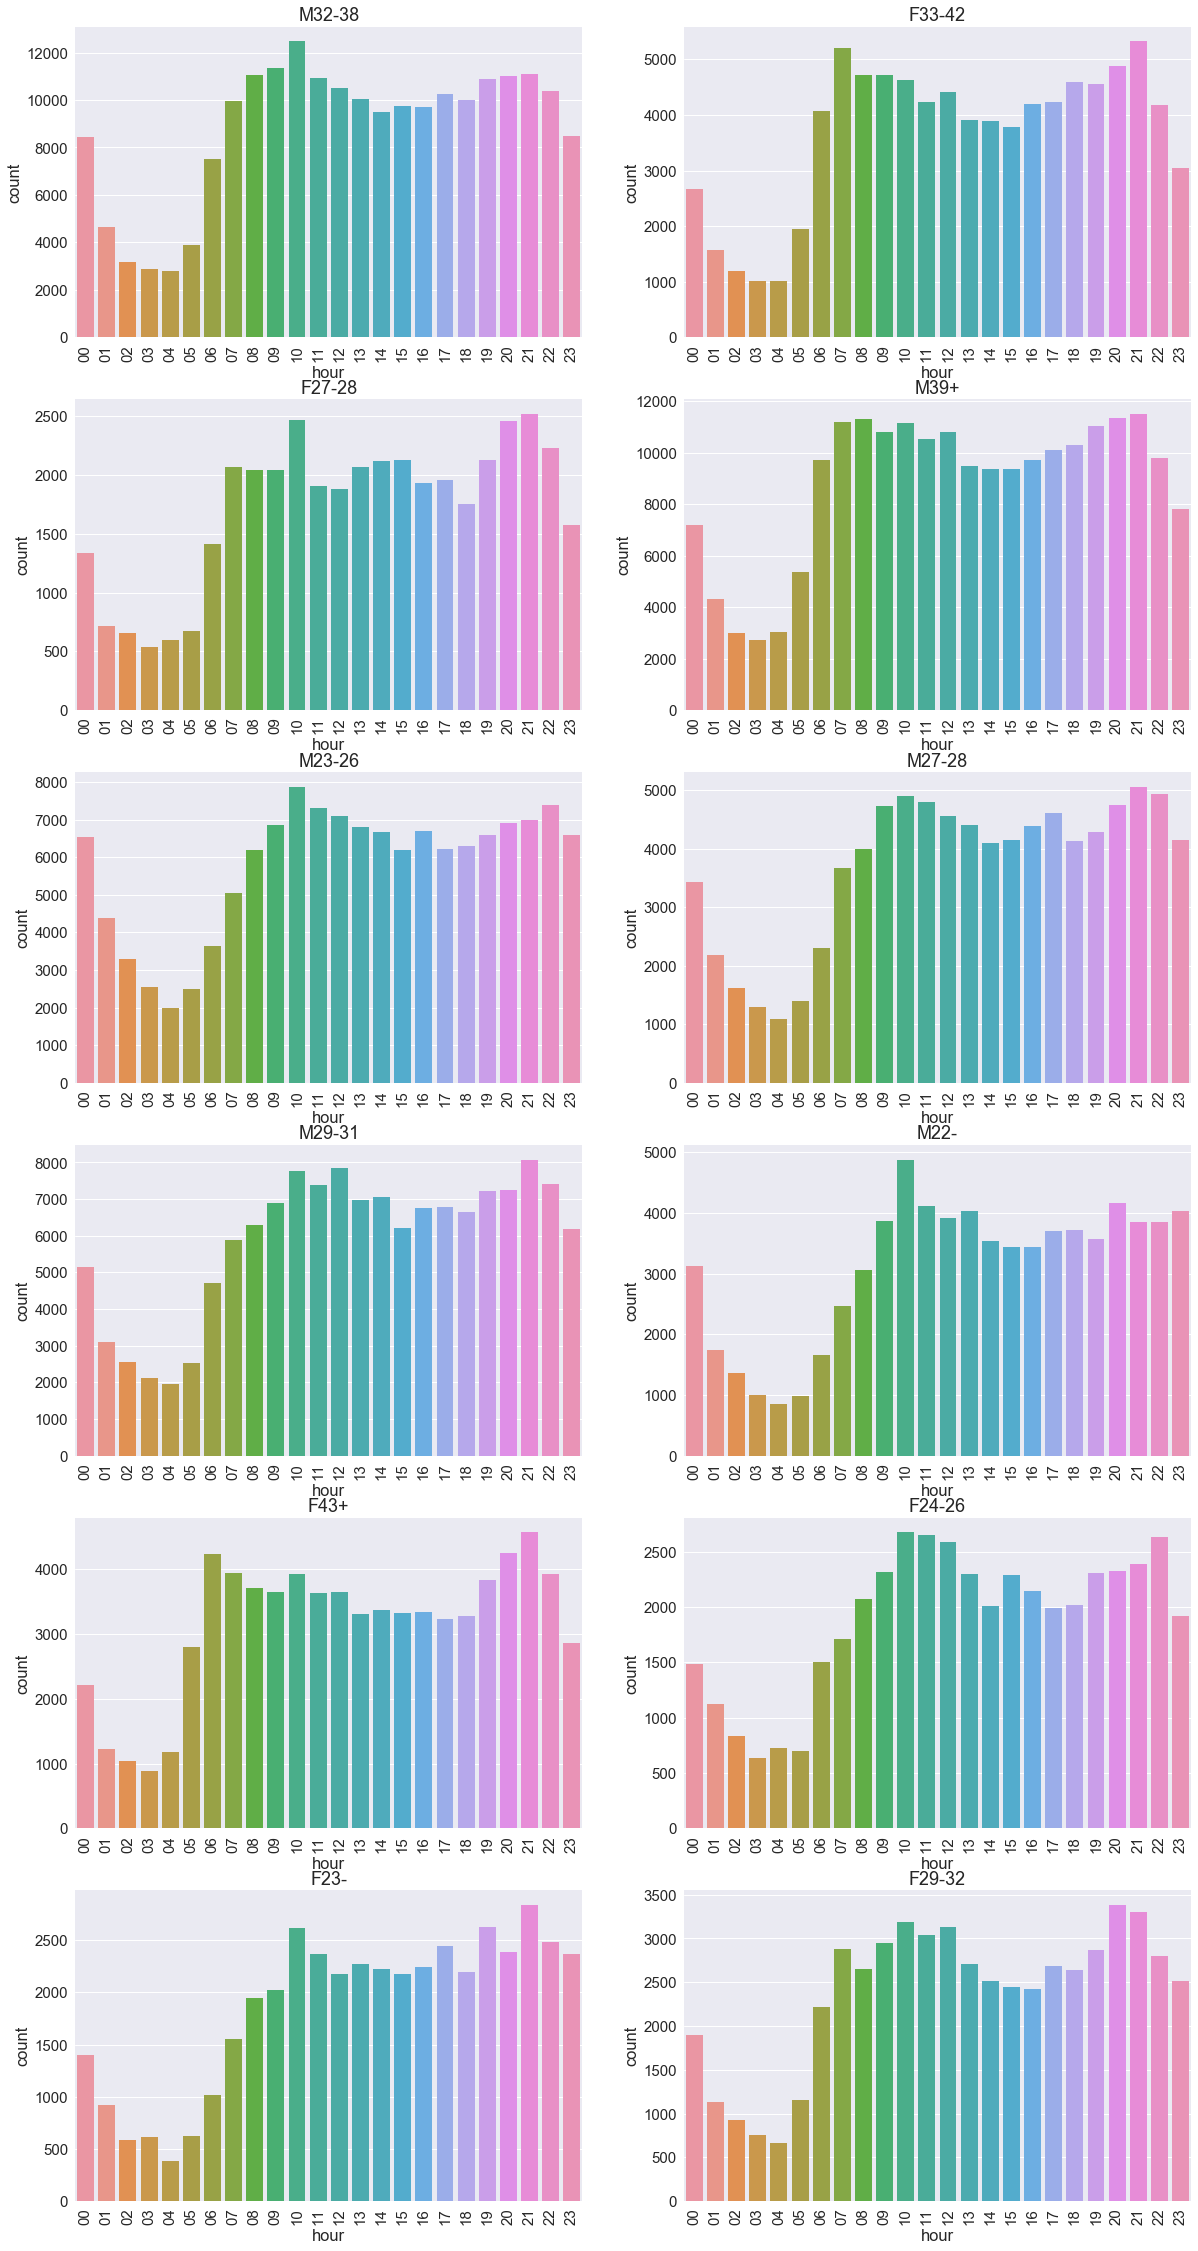

In [20]:
fig= plt.figure(figsize=(20,40))

groups = train_time['group'].unique()
sns.set(font_scale=1.5)
for i, group in enumerate(groups):
    plt.subplot(6,2,i+1)
    sns.countplot(train_time[train_time['group']==group]['hour'], 
                  order = ['00', '01', '02', '03','04', '05','06','07','08','09','10','11', '12' ,'13','14','15', '16', '17', '18'
                            ,'19','20','21','22','23']
                 )
    plt.xticks(rotation=90)
    plt.title(group)
     

# Visualizing Mobile Usage by Day of Week

In [21]:
columns = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

index = ['M22-','M23-26','M27-28','M29-31','M32-38', 'M39+','F23-','F24-26','F27-28','F29-32','F33-42','F43+']

group_time = pd.DataFrame(columns=columns, index=index)


for group in index:
    for column in columns:
        group_time[column][group] = (train_time[train_time['group']==group]['Day of Week'].value_counts()[column]/
                                     train_time[train_time['group']==group]['Day of Week'].value_counts().sum()
                                    )

for column in columns:
    group_time[column]=group_time[column].astype(float)

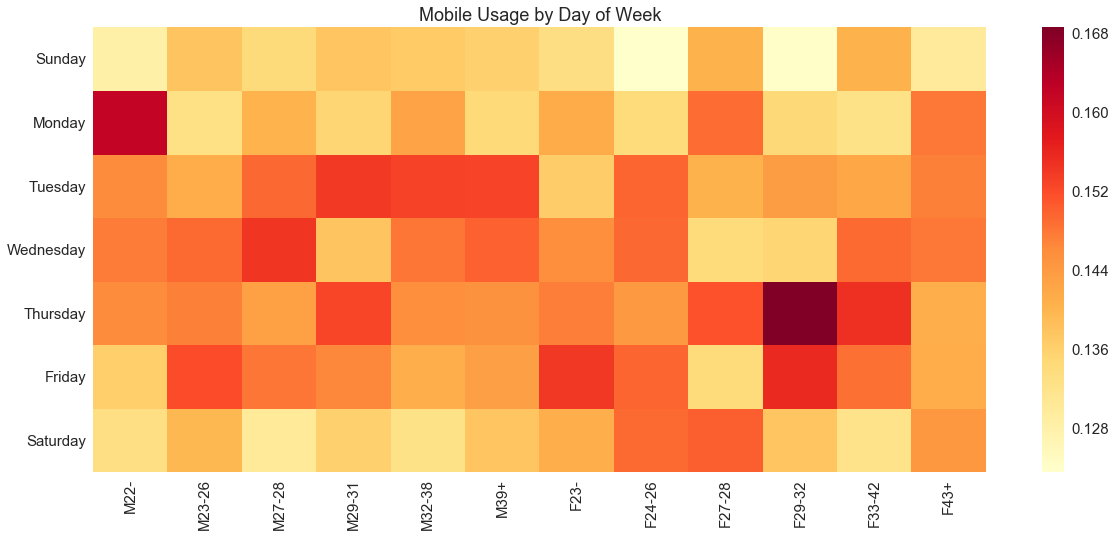

In [23]:
plt.figure(figsize=(20,18))

plt.subplot(2,1,1)
sns.heatmap(group_time.T[['M22-','M23-26','M27-28','M29-31','M32-38', 'M39+','F23-','F24-26','F27-28','F29-32','F33-42','F43+']], cmap = 'YlOrRd')
sns.set(font_scale=1.5)
plt.xticks(rotation=90)
plt.title('Mobile Usage by Day of Week')


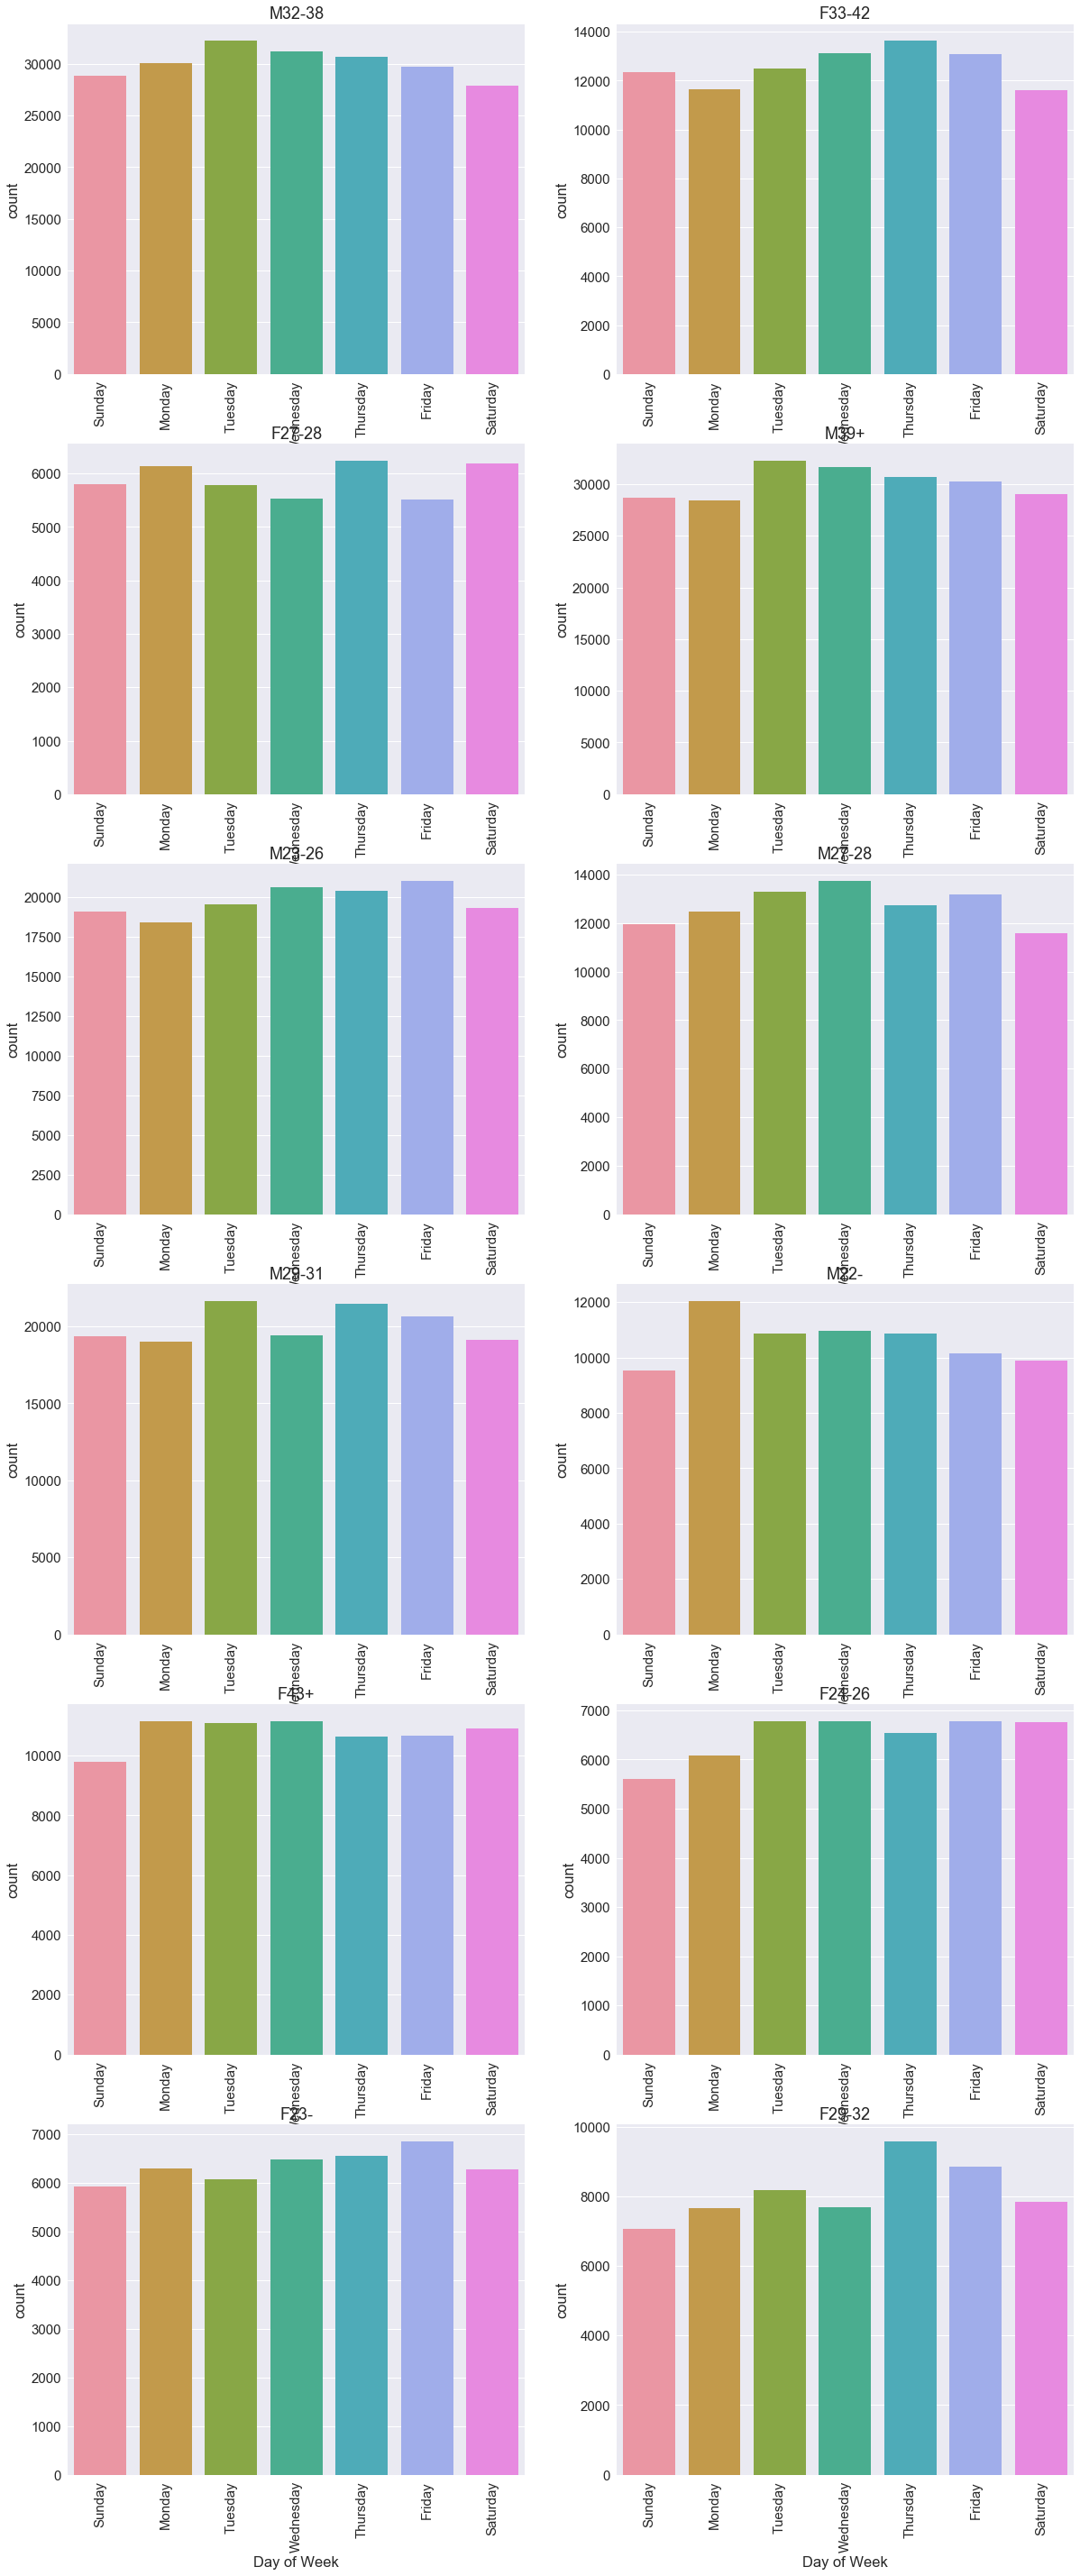

In [24]:
fig= plt.figure(figsize=(20,50))

groups = train_time['group'].unique()
sns.set(font_scale=1.5)
for i, group in enumerate(groups):
    plt.subplot(6,2,i+1)
    sns.countplot(train_time[train_time['group']==group]['Day of Week'], 
                  order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
                 )
    plt.xticks(rotation=90)
    plt.title(group)
     